# Evaluating the alignment of equivitals

Using both taps and reich per participant to check how much the alignment from "template" these equivital measurements wander

In [2]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json 
from scipy.signal import butter, filtfilt, argrelextrema
from scipy import interpolate
from scipy.interpolate import interp1d

In [37]:
%load_ext autoreload
%autoreload 1
%aimport eq
%aimport qex

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%reload_ext autoreload

In [186]:
synch_times = {'RD':pd.to_datetime('2023-02-15 11:05:36.897+0000'), # 97.0 
                 'C1':pd.to_datetime('2023-02-16 8:33:18.324+0000'),
                 'C2':pd.to_datetime('2023-02-16 10:16:22.697+0000'),
                 'C3':pd.to_datetime('2023-02-17 8:30:51.841+0000'),
                 'C4':pd.to_datetime('2023-02-17 10:16:29.298+0000'),
                 'C5':pd.to_datetime('2023-02-18 15:10:29.583+0000')}

clap_times = {'RD': pd.to_datetime('2023-02-15 11:16:50.719+0000'),
                 'C1': pd.to_datetime('2023-02-16 08:45:22.246+0000'),
                 'C2': pd.to_datetime('2023-02-16 10:27:10.927+0000'),
                 'C3': pd.to_datetime('2023-02-17 08:40:31.007+0000'),
                 'C4': pd.to_datetime('2023-02-17 10:27:23.179+0000'),
                 'C5': pd.to_datetime('2023-02-18 15:22:04.555+0000')}

In [256]:
# old alignments
synch_times = {'RD':pd.to_datetime('2023-02-15 11:05:37.000+0000'), # 97.0 
                 'C1':pd.to_datetime('2023-02-16 8:33:19.000+0000'),
                 'C2':pd.to_datetime('2023-02-16 10:16:23.000+0000'),
                 'C3':pd.to_datetime('2023-02-17 8:30:52.000+0000'),
                 'C4':pd.to_datetime('2023-02-17 10:16:28.000+0000'),
                 'C5':pd.to_datetime('2023-02-18 15:10:31.000+0000')}

clap_times = {'RD': pd.to_datetime('2023-02-15 11:16:50.719+0000'),
                 'C1': pd.to_datetime('2023-02-16 08:45:22.246+0000'),
                 'C2': pd.to_datetime('2023-02-16 10:27:10.927+0000'),
                 'C3': pd.to_datetime('2023-02-17 08:40:31.007+0000'),
                 'C4': pd.to_datetime('2023-02-17 10:27:23.179+0000'),
                 'C5': pd.to_datetime('2023-02-18 15:22:04.555+0000')}

In [257]:
player_order = ['VN102','VN107','VN106','VN108','VN101','VN105','VN103','VN104','VN205','VN203','VN202','VN206','VN209','VN210','VN207','VN208','VN201','VN204','VA305','VA307','VA308','VA301','VA306','VA302','VA303','VA304','LS406','LS407','LS408','LS405','LS401','LS403','LS402','LS410','LS404','WW505','WW502','WW503','WW506','WW501','WW504','WW507','BR604','BR603','BR602','BR606','BR607','BR605','BR601','PC704','PC705','PC703','PC701','PC702','PC707']

In [258]:
Piece_timings = pd.read_csv('./Timing/ctimes.csv',index_col = 'Event')
Piece_timings 

,RD,C1,C2,C3,C4,C5
Event,,,,,,
Pre-Audio,NaN,NaN,-421.378,NaN,NaN,-981.902
Warmup,-300.000,-348.482,-361.303,-52.946,-344.999,-386.462
Tuning,-58.745,-61.511,-49.122,-48.773,-48.983,-225.636
Synch Taps,0.000,0.000,0.000,0.000,0.000,0.000
Applause for Conductor,19.294,28.292,122.014,76.074,21.929,-30.137
Saevarud,43.907,44.900,3279.222,3288.046,30.147,15.336
Applause for Saevarud,280.462,279.156,3511.465,3518.249,265.054,246.166
MC pre Reich,285.523,294.284,268.682,218.914,274.913,257.826
Reich,673.822,723.922,648.230,579.166,653.881,694.972


For orchestra members performing on Thursday, we have four points for quasi reliable alignment: Tapping cues to C1, Reich onset for C1, Tapping for C2, and Reich onset for C2

We need tapping references for each of these moments. 

In [259]:
os.listdir('./Timing/')

['RD_Reic3.csv',
 'claps_lydo1.csv',
 'Full_Live_Concert.cue',
 'claps_lydo1_norge.csv',
 'RD_Reic2.csv',
 'RD_Reic1.csv',
 'RD_Reics23.csv',
 '.DS_Store',
 'reic_synch_confidence.csv',
 'Synch_Cue_Short_template_100Hz.csv',
 'ConcertDateTimes.csv',
 'ctimes.csv',
 'synch_cue.csv',
 'Reic_C2_Cue_template_256Hz.csv',
 'synch1_cues.png',
 'C1_reic_claps.csv',
 'Synch_Cue_template_100Hz.csv',
 'Synch_Cue_Short_template_256Hz.csv',
 'short_synch_cue.csv',
 'Reic_C1_Cue_template_256Hz.csv',
 '.ipynb_checkpoints',
 'C5_reic_claps.csv',
 'C2_reic_claps.csv',
 'EventDateTimes.csv']

In [260]:
cues_files = {'C1_Synch': './Timing/Synch_Cue_Short_template_256Hz.csv',
              'C1_Riec': './Timing/Reic_C1_Cue_template_256Hz.csv',
              'C2_Synch': './Timing/Synch_Cue_Short_template_256Hz.csv',
              'C2_Riec': './Timing/Reic_C2_Cue_template_256Hz.csv'}
cues_datetimes = {'C1_Synch': synch_times['C1'],
              'C1_Riec': clap_times['C1'],
              'C2_Synch':synch_times['C2'],
              'C2_Riec': clap_times['C2']}
cues_ctimes = {'C1_Synch': 0.0,
              'C1_Riec': 723.922,
              'C2_Synch':0.0,
              'C2_Riec': 648.230}
align_files = {'C1_Synch': './out_data/CorrectedEQ_synch_C1_offsets.csv',
              'C1_Riec': './out_data/CorrectedEQ_reic_synch_C1_offsets.csv',
              'C2_Synch': './out_data/CorrectedEQ_synch_C2_offsets.csv',
              'C2_Riec': './out_data/CorrectedEQ_reic_synch_C2_offsets.csv'}

cues = {}
prealign = {}

for c in cues_files.keys():
    Cue_template = pd.read_csv(cues_files[c],index_col=0)
    ct = Cue_template.index
    Cue_template['datetime'] = cues_datetimes[c]+pd.to_timedelta(Cue_template.index,unit='s')
    Cue_template['ctime'] = cues_ctimes[c]+Cue_template.index
    cues[c] = Cue_template.copy()
    prealign[c] = pd.read_csv(align_files[c],index_col=0)
    # set cues in datetime and concert time 

<AxesSubplot:>

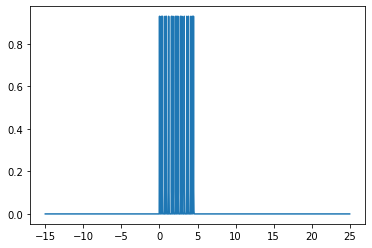

In [261]:
Cue_template['spoint'].plot()

In [262]:
prealign[c].loc[pid,'synch_dev_time'] 

'2023-02-16 10:27:12.119000+00:00'

# Look at alignment for one player

In [263]:
eq_data_loc = '../Data/Equivital/Lydo_C1_C2/'
sep = '/'
projectName=''
df_datafiles = qex.qiosk_recordings(eq_data_loc,projectName,sep)
df_datafiles.set_index('DevName',inplace=True)
xrange = [pd.to_timedelta(-5,unit = 's'),pd.to_timedelta(15,unit = 's')]
pi = 0
#df_datafiles


In [264]:

pid = player_order[pi]
pi+=1

In [265]:
prealign[c].loc[pid,] 

s_corr0                                                          0.363778
s_corr_offset                                                    0.430451
s_offset_samples                                                      298
s_offset_time                                                       1.192
Length_xcorr_samples                                                 5121
Length_xcorr_time                                                  20.484
auto_offset_time                                                    1.192
Full_CCC                (array([-2560, -2559, -2558, ...,  2558,  2559...
dt_offset                                                             NaN
synch_dev_time                           2023-02-16 10:27:12.119000+00:00
Name: VN102, dtype: object

In [266]:
sigFileLoc = '../Data/Equivital/Lydo_C1_C2/FASTACC'+ df_datafiles.loc[pid,'FileName'][4:]
V = pd.read_csv(sigFileLoc,skipinitialspace=True)
V['DateTime'] = pd.to_datetime(V['DateTime']) 
df = V.loc[:,[ 'Vert Accelerometer','Lat Accelerometer','Long Accelerometer']]
V['jerk'] = np.sqrt(np.square(df.diff()).sum(axis=1))
#sig_t = (V['DateTime'] - s_time).dt.total_seconds()

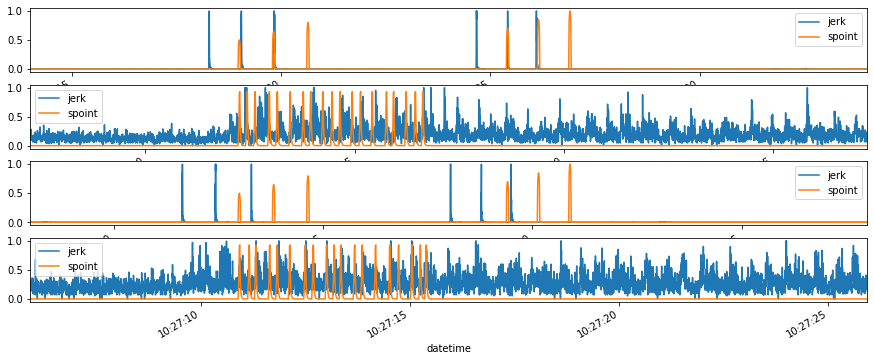

In [267]:
# for each of the alginemnt times, plot the signal in original timing
fig, ax = plt.subplots(len(cues), 1,figsize = [15,6])
i = 0
for c in cues.keys():
    s_time = cues_datetimes[c]
    trange = [s_time + xrange[0],s_time + xrange[1]]
    X = V.loc[V['DateTime']>trange[0],:].copy()
    signal = X.loc[X['DateTime']<trange[1],['DateTime','jerk']].copy()
    signal.loc[signal['jerk'].isna(),'jerk'] = 0
    M = signal['jerk'].quantile(0.998)
    signal['jerk'] = signal['jerk'] /M
    signal.loc[signal['jerk']>1,'jerk'] = 1
    
    signal.plot(x ='DateTime', y='jerk',ax=ax[i])
    
    cues[c].plot(x='datetime',y='spoint',ax=ax[i])
    ax[i].set_xlim(trange)
    i+=1

In [269]:
s_time

Timestamp('2023-02-16 10:27:10.927000+0000', tz='UTC')

Text(0.5, 1.0, 'Shifted cues to signal')

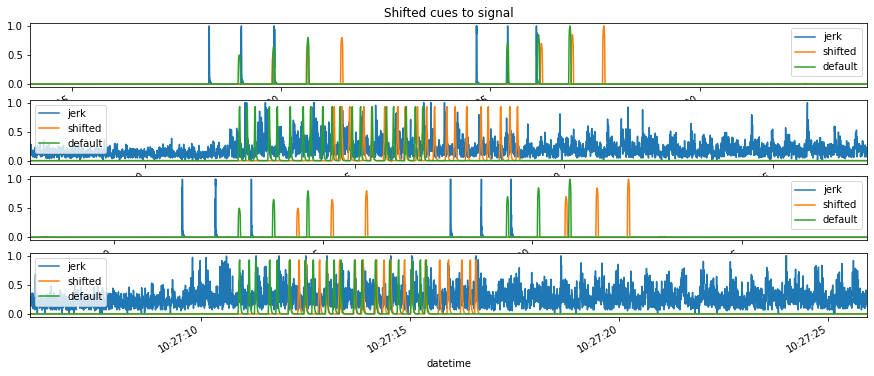

In [268]:
# for each of the alginemnt times, plot the signal in original timing
fig, ax = plt.subplots(len(cues), 1,figsize = [15,6])
i = 0
for c in cues.keys():
    s_time = cues_datetimes[c]
    trange = [s_time + xrange[0],s_time + xrange[1]]
    X = V.loc[V['DateTime']>trange[0],:].copy()
    signal = X.loc[X['DateTime']<trange[1],['DateTime','jerk']].copy()
    signal.loc[signal['jerk'].isna(),'jerk'] = 0
    M = signal['jerk'].quantile(0.998)
    signal['jerk'] = signal['jerk'] /M
    signal.loc[signal['jerk']>1,'jerk'] = 1
    signal.plot(x ='DateTime', y='jerk',ax=ax[i])
    
    shifted_cue = cues[c].copy()
    shifted_cue['Sy_datetime'] = pd.to_datetime(prealign[c].loc[pid,'synch_dev_time'])+pd.to_timedelta(shifted_cue.index,unit='s')
    shifted_cue.plot(x='Sy_datetime',y='spoint',ax=ax[i],label='shifted')
    
    cues[c].plot(x='datetime',y='spoint',ax=ax[i],label='default')
    
    ax[i].set_xlim(trange)
    i+=1
ax[0].set_title('Shifted cues to signal')

In [249]:
prealign[c].loc[pid,'synch_dev_time']

'2023-02-16 10:27:12.119000+00:00'

1.192
1.192
1.192
1.192


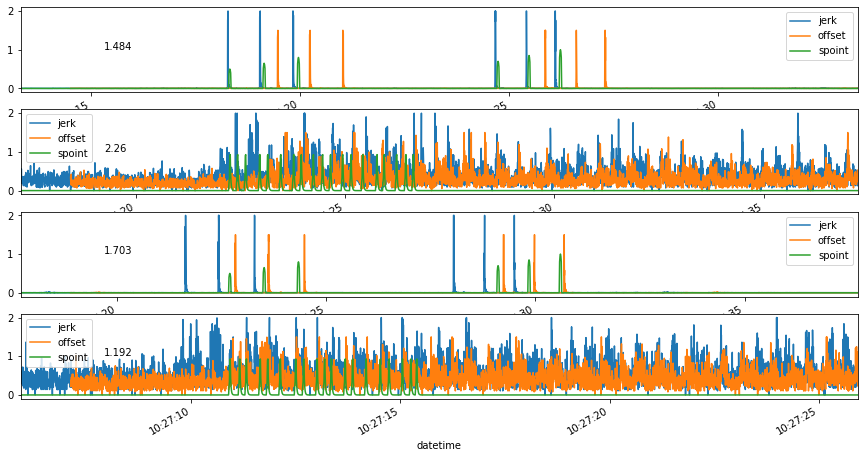

In [248]:
# for each of the alginemnt times, plot the signal in original timing
fig, ax = plt.subplots(len(cues), 1,figsize = [15,8])
i = 0
d='C1_Riec'
for c in cues.keys():
    s_time = cues_datetimes[c]
    trange = [s_time + xrange[0],s_time + xrange[1]]
    X = V.loc[V['DateTime']>trange[0],:].copy()
    X['DateTime'] = X['DateTime']
    signal = X.loc[X['DateTime']<trange[1],['DateTime','jerk']].copy()
    signal.loc[signal['jerk'].isna(),'jerk'] = 0
    M = signal['jerk'].quantile(0.998)
    signal['jerk'] = 2*signal['jerk'] /M
    signal.loc[signal['jerk']>2,'jerk'] = 2
    
    signal.plot(x ='DateTime', y='jerk',ax=ax[i])
    
    alt_signal = signal.copy()
    
    shift_dt = (pd.to_datetime(prealign[c].loc[pid,'synch_dev_time'])-s_time)
    ax[i].text(trange[0]+pd.to_timedelta(2,unit='s'),1,str(np.round(shift_dt.total_seconds(),4)))
    
    shift_dt = pd.to_timedelta(1.192,unit='s')
    print(shift_dt.total_seconds())
#     ax[i].text(trange[0]+pd.to_timedelta(2,unit='s'),0.5,str(np.round(prealign[c].loc[pid,'s_offset_time'],4)))
#     shift_dt = pd.to_timedelta(prealign[c].loc[pid,'s_offset_time'],unit='s')
#     print(shift_dt.total_seconds())
    alt_signal['DateTime'] = alt_signal['DateTime'] + shift_dt
    alt_signal['jerk'] = alt_signal['jerk']*0.75
    alt_signal.plot(x ='DateTime', y='jerk',ax=ax[i],label='offset')
    
    cues[c].plot(x='datetime',y='spoint',ax=ax[i])
    #prealign[c].loc[pid,'synch_dev_time'] 

    ax[i].set_xlim(trange)
    #ax[i].legend()
    i+=1

In [181]:
#signal = X.loc[X['DateTime']<trange[1],['DateTime','jerk']].copy()
prealign[c].loc[pid,'synch_dev_time'] 
X['DateTime'] + (s_time-pd.to_datetime(prealign[c].loc[pid,'synch_dev_time']))


2029037   2023-02-16 10:27:05.609000+00:00
2029038   2023-02-16 10:27:05.613000+00:00
2029039   2023-02-16 10:27:05.617000+00:00
2029040   2023-02-16 10:27:05.621000+00:00
2029041   2023-02-16 10:27:05.625000+00:00
                        ...               
2995195   2023-02-16 11:29:59.664000+00:00
2995196   2023-02-16 11:29:59.668000+00:00
2995197   2023-02-16 11:29:59.672000+00:00
2995198   2023-02-16 11:29:59.675000+00:00
2995199   2023-02-16 11:29:59.679000+00:00
Name: DateTime, Length: 966163, dtype: datetime64[ns, UTC]

In [180]:
X['DateTime']

2029037   2023-02-16 10:27:05.929000+00:00
2029038   2023-02-16 10:27:05.933000+00:00
2029039   2023-02-16 10:27:05.937000+00:00
2029040   2023-02-16 10:27:05.941000+00:00
2029041   2023-02-16 10:27:05.945000+00:00
                        ...               
2995195   2023-02-16 11:29:59.984000+00:00
2995196   2023-02-16 11:29:59.988000+00:00
2995197   2023-02-16 11:29:59.992000+00:00
2995198   2023-02-16 11:29:59.995000+00:00
2995199   2023-02-16 11:29:59.999000+00:00
Name: DateTime, Length: 966163, dtype: datetime64[ns, UTC]

In [185]:
s_time

Timestamp('2023-02-16 09:33:18.324000+0100', tz='pytz.FixedOffset(60)')

In [212]:
(s_time-pd.to_datetime(prealign[c].loc[pid,'synch_dev_time'])).total_seconds()

-0.32

In [213]:
prealign[c].loc[pid,'s_offset_time']

0.3199999999999647

<AxesSubplot:xlabel='datetime'>

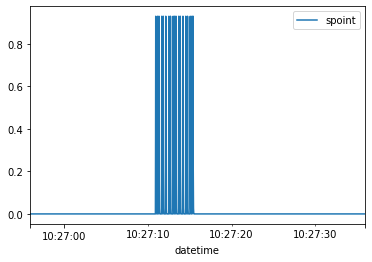

In [65]:
cues[c].plot(x='datetime',y='spoint')